In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
# Load your training and validation sets using image_dataset_from_directory
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",  
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",  
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

# Define your model architecture
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(128,128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())




model.add(Dense(38, activation='softmax'))
# Compile your model with appropriate optimizer, loss, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
from sklearn.preprocessing import LabelEncoder

# Define your plant and disease names
plant_names = [
    'Apple', 'Apple', 'Apple', 'Apple', 'Blueberry', 'Cherry', 'Cherry', 'Corn', 'Corn',
    'Corn', 'Corn', 'Grape', 'Grape', 'Grape', 'Grape', 'Orange', 'Peach', 'Peach', 'Pepper, bell',
    'Pepper, bell', 'Potato', 'Potato', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry',
    'Strawberry', 'Tomato', 'Tomato', 'Tomato', 'Tomato', 'Tomato', 'Tomato', 'Tomato', 'Tomato', 'Tomato'
]
disease_names = [
    '__Apple_scab', '__Black_rot', '__Cedar_apple_rust', '__healthy', '__healthy', '(including_sour)___healthy',
    '(including_sour)___Powdery_mildew', '(maize)___Cercospora_leaf_spot Gray_leaf_spot', '(maize)___Common_rust_',
    '(maize)___healthy', '(maize)___Northern_Leaf_Blight', '__Black_rot', '__Esca_(Black_Measles)', '__healthy',
    '__Leaf_blight_(Isariopsis_Leaf_Spot)', '__Haunglongbing_(Citrus_greening)', '__Bacterial_spot', '__healthy',
    'bell___Bacterial_spot', 'bell___healthy', '__Early_blight', '__healthy', '__Late_blight', '__healthy', '__healthy',
    '__Powdery_mildew', '__healthy', '__Leaf_scorch', '__Bacterial_spot', '__Early_blight', '__healthy',
    '__Late_blight', '__Leaf_Mold', '__Septoria_leaf_spot', '__Spider_mites Two-spotted_spider_mite', '__Target_Spot',
    '__Tomato_mosaic_virus', '__Tomato_Yellow_Leaf_Curl_Virus'
]

# Combine plant and disease names into a single label
labels = [f"{plant}_{disease}" for plant, disease in zip(plant_names, disease_names)]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the combined labels
label_encoder.fit(labels)

# Transform the labels using LabelEncoder
encoded_labels = label_encoder.transform(labels)

# Print the encoded labels for demonstration
print(encoded_labels)




 



# Train your model using the training and validation datasets directly
training_history = model.fit(training_set,
                             validation_data=validation_set,
                             epochs=8)


Found 70296 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


C:\Users\aparn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 125, 125, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,668,806 (6.37 MB)

 Trainable params: 1,668,230 (6.36 MB)

 Non-trainable params: 576 (2.25 KB)

[ 0  1  2  3  4  6  5  7  8 10  9 11 12 14 13 15 16 17 18 19 20 22 21 23
 24 25 27 26 28 29 36 30 31 32 33 34 35]
Epoch 1/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 903s 818ms/step - accuracy: 0.4679 - loss: 2.0638 - val_accuracy: 0.8330 - val_loss: 0.7238
Epoch 2/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 900s 818ms/step - accuracy: 0.8002 - loss: 0.8042 - val_accuracy: 0.8858 - val_loss: 0.4654
Epoch 3/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 900s 818ms/step - accuracy: 0.8717 - loss: 0.5204 - val_accuracy: 0.9104 - val_loss: 0.3545
Epoch 4/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 900s 818ms/step - accuracy: 0.9064 - loss: 0.3797 - val_accuracy: 0.9199 - val_loss: 0.2970
Epoch 5/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 903s 821ms/step - accuracy: 0.9305 - loss: 0.2825 - val_accuracy: 0.9397 - val_loss: 0.2195
Epoch 6/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 903s 821ms/step - accuracy: 0.9440 - loss: 0.2234 - val_accuracy: 0.9432 - val_loss: 0.1945
Epoch 7/8
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 902s 821ms/step - accuracy: 0.9595 - loss: 0.17

In [2]:
train_loss,train_acc=model.evaluate(training_set)

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 222s 201ms/step - accuracy: 0.9951 - loss: 0.0384


In [3]:
print("train_loss:",train_loss,"train_accuracy:",train_acc)

train_loss: 0.03573605418205261 train_accuracy: 0.9958176612854004


In [4]:
valid_loss,valid_acc=model.evaluate(validation_set)

275/275 ━━━━━━━━━━━━━━━━━━━━ 55s 197ms/step - accuracy: 0.9510 - loss: 0.1643


In [5]:
print("valid_loss:",valid_loss,"valid_accuracy:",valid_acc)

valid_loss: 0.16046956181526184 valid_accuracy: 0.9513999819755554


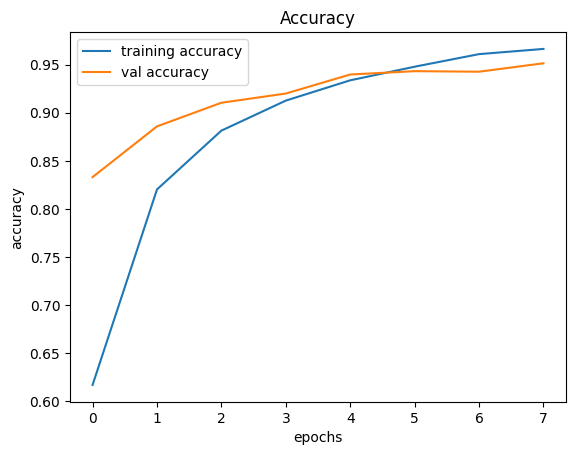

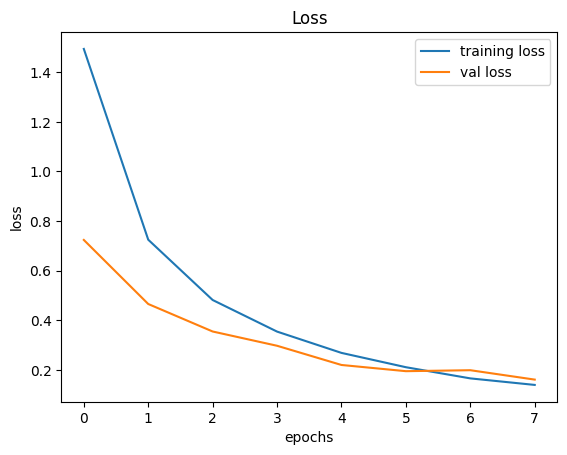

In [8]:
              # Plotting graphs for accuracy
import matplotlib.pyplot as plt
plt.figure(0)
plt.title('Accuracy')

plt.plot(training_history.history['accuracy'], label='training accuracy')
plt.plot(training_history.history['val_accuracy'], label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.title('Loss')
plt.plot(training_history.history['loss'], label='training loss')
plt.plot(training_history.history['val_loss'], label='val loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
model.save("plant_disease_prediction_model2.h5")

In [11]:
import json
with open("train_hist.json","w") as f:
    json.dump(training_history.history,f)

In [12]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [13]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",  # Ensure labels are inferred as integers
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

Found 17572 files belonging to 38 classes.


In [14]:
y_pred=model.predict(test_set)
y_pred

275/275 ━━━━━━━━━━━━━━━━━━━━ 50s 180ms/step


array([[9.9048048e-01, 3.0041591e-03, 1.1413250e-04, ..., 2.1345970e-06,
        2.2656648e-06, 6.6508769e-06],
       [9.8443431e-01, 6.3861515e-03, 9.5596428e-05, ..., 1.4077411e-06,
        4.3169857e-06, 6.3400330e-05],
       [9.9956113e-01, 3.8837647e-05, 5.4367581e-05, ..., 1.4922880e-07,
        8.0730473e-08, 3.5563423e-06],
       ...,
       [1.9872964e-07, 2.4881397e-09, 9.5165620e-07, ..., 6.2887744e-07,
        1.5285385e-06, 9.9968410e-01],
       [3.8520142e-08, 3.0915398e-08, 3.8496196e-08, ..., 3.5605967e-07,
        4.2805443e-08, 9.9996734e-01],
       [1.2348386e-07, 2.8389275e-07, 2.7749930e-08, ..., 2.0612057e-07,
        9.5461932e-05, 9.9901581e-01]], dtype=float32)

In [15]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [16]:
true_categories=tf.concat([y for x,y in test_set],axis=0)

In [17]:
y_true=tf.argmax(true_categories,axis=1)

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score




# Calculate overall precision, recall, and F1-score
overall_precision = precision_score(y_true, predicted_categories, average='macro')
overall_recall = recall_score(y_true, predicted_categories, average='macro')
overall_f1_score = f1_score(y_true, predicted_categories, average='macro')

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1-Score:", overall_f1_score)


Overall Precision: 0.9523922951161928
Overall Recall: 0.951189572643289
Overall F1-Score: 0.9513289452638775


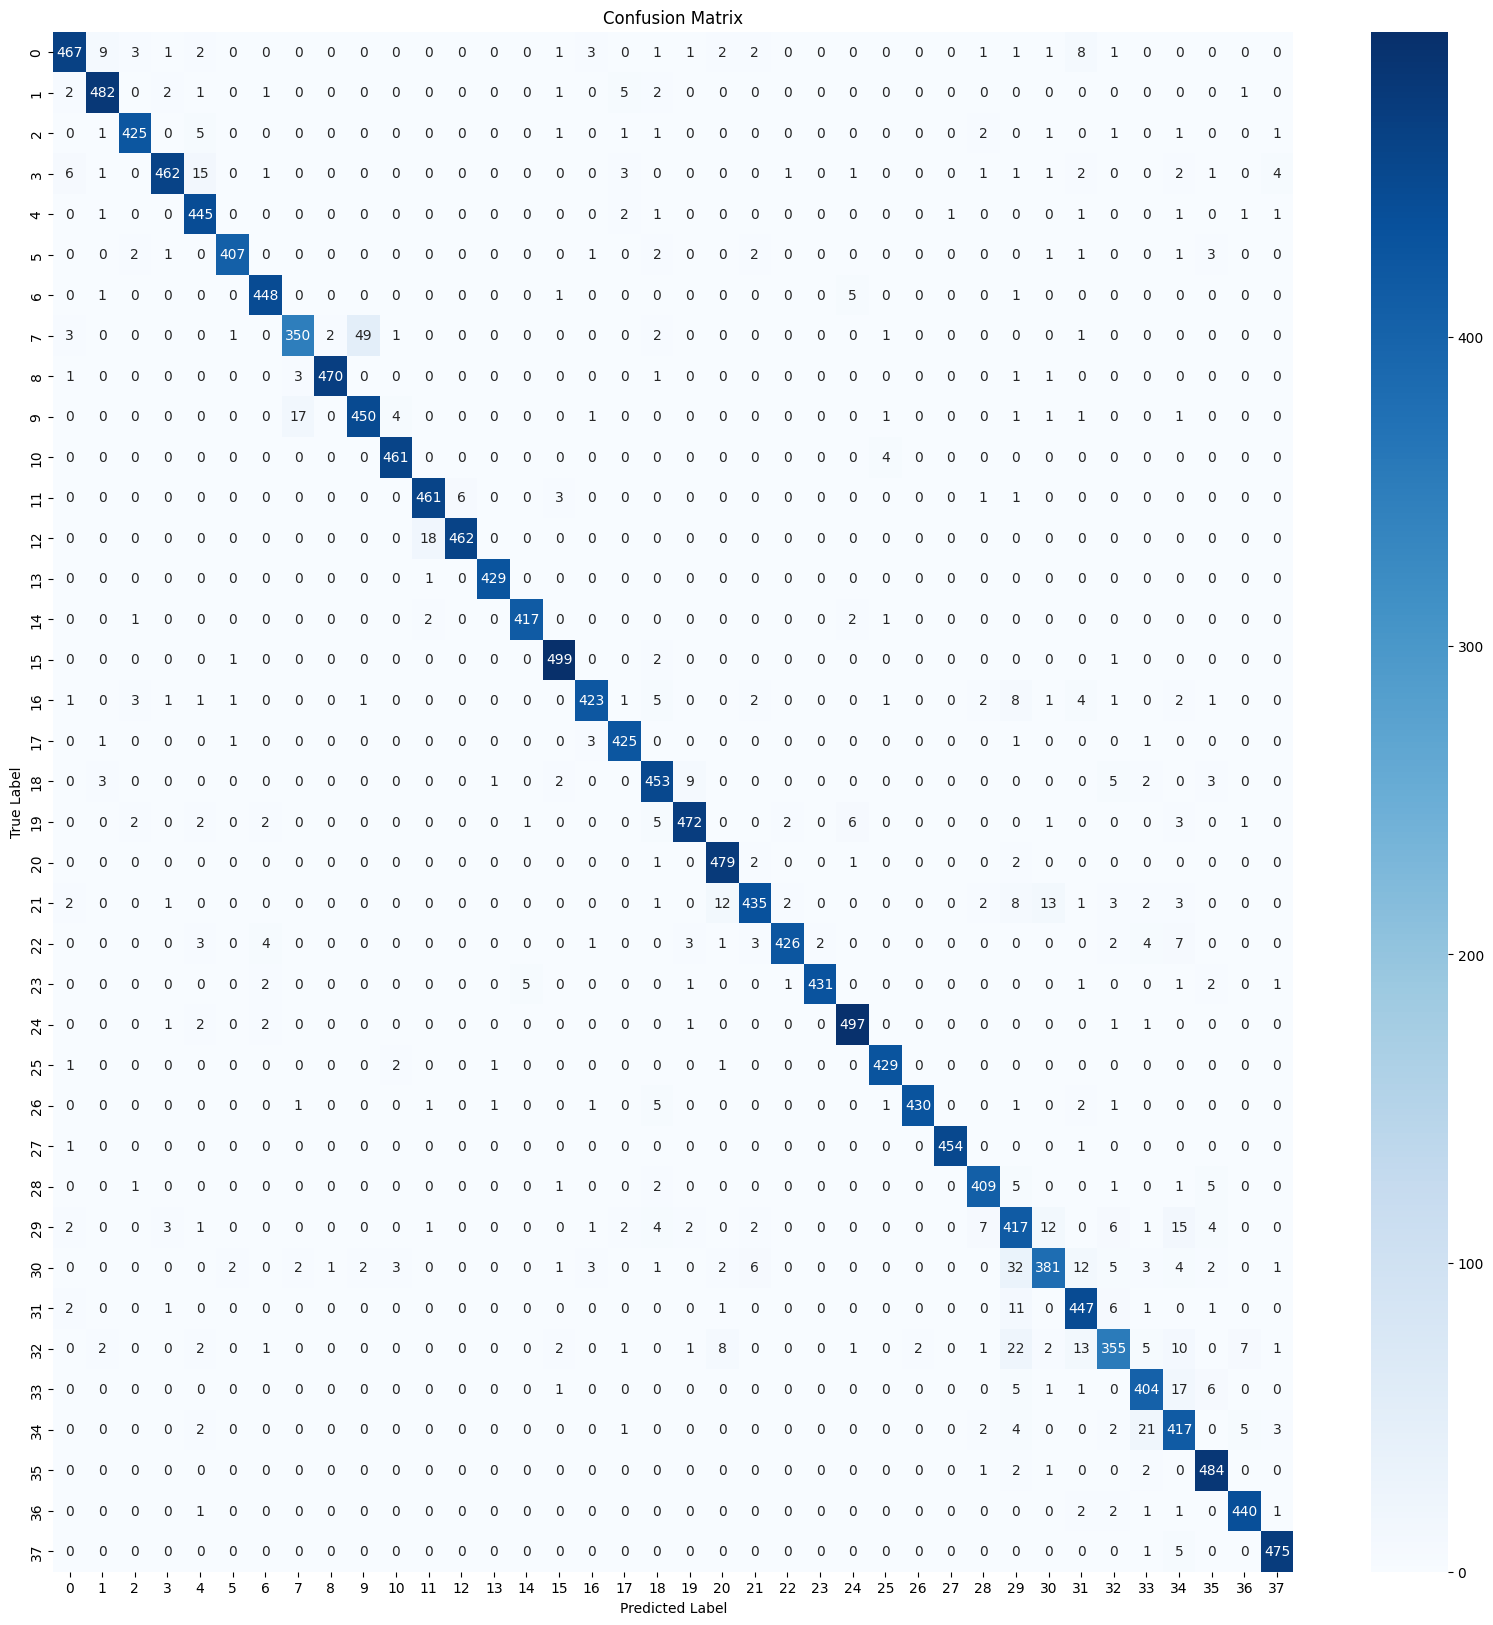

In [19]:
from sklearn.metrics import confusion_matrix

import seaborn as sns


# Plot confusion matrix
conf_matrix = confusion_matrix(y_true,predicted_categories)
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
model=tf.keras.models.load_model("plant_disease_prediction_model2.h5")

In [22]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']


In [30]:
import cv2

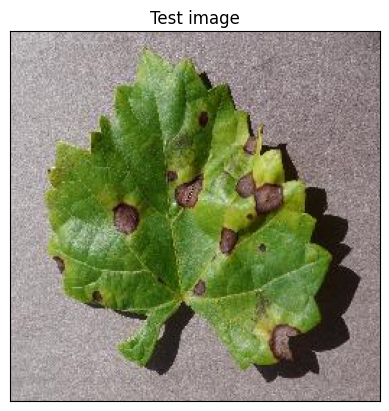

In [38]:
image_path ="valid/Grape___Black_rot/00905d40-bddf-460e-b348-1dbb6a34653b___FAM_B.Rot 0664.JPG"
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [39]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [40]:
predictions=model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [41]:
result_index=np.argmax(predictions)
result_index

11

In [42]:
model_pred=class_name[result_index]
model_pred

'Grape___Black_rot'